In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import pandas as pd
from sympy import sequence

In [14]:
data = pd.read_csv(r"C:\Users\10725880\Downloads\sales_data (2).csv")

df = data[['Date','Order_Quantity']]
df = df.groupby('Date').sum()
df.sort_values(by='Order_Quantity')

Order_Quantity
Date                      
2011-02-21               1
2011-11-04               1
2011-05-29               1
2012-11-04               2
2011-09-28               2
...                    ...
2014-06-14            2883
2015-12-07            3013
2013-12-07            3093
2016-03-01            3571
2014-03-01            3689

[1884 rows x 1 columns]

In [15]:
scaler = MinMaxScaler()
df['Order_Quantity'] = scaler.fit_transform(df['Order_Quantity'].values.reshape(-1,1))

print(df.sort_values('Order_Quantity'))

            Order_Quantity
Date                      
2011-02-21        0.000000
2011-11-04        0.000000
2011-05-29        0.000000
2012-11-04        0.000271
2011-09-28        0.000271
...                    ...
2014-06-14        0.781453
2015-12-07        0.816703
2013-12-07        0.838395
2016-03-01        0.968004
2014-03-01        1.000000

[1884 rows x 1 columns]


In [21]:
train_size = int(len(df)*0.7)
train_data,test_data = df[:train_size],df[train_size:]
print(train_size)
print(test_data)
# print(train_data)

            Order_Quantity
Date                      
2015-01-12        0.002711
2015-01-13        0.004610
2015-01-14        0.002711
2015-01-15        0.005694
2015-01-16        0.004610
...                    ...
2016-07-27        0.218547
2016-07-28        0.360900
2016-07-29        0.242408
2016-07-30        0.228308
2016-07-31        0.343275

[566 rows x 1 columns]


In [23]:
def create_sequences(data,sequence_length):
    sequences, labels = [],[]
    for x in range(len(data) - sequence_length):
        sequence = data.iloc[x:x+sequence_length]['Order_Quantity']
        target = data.iloc[x+sequence_length]['Order_Quantity']
        sequences.append(sequence)
        labels.append(target)
        # print("Sequences:{}".format(sequence))
        # print("Labels :{}".format(target))
    return np.array(sequences), np.array(labels)

In [6]:
sequence_length = 5
x_train,y_train = create_sequences(train_data,sequence_length)
x_test, y_test = create_sequences(test_data,sequence_length)

In [7]:
from pickletools import optimize


model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.fit(x_train, y_train,epochs=100,batch_size=32)

Epoch 1/100
42/42 [==============================] - 4s 8ms/step - loss: 0.0383
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 3/100
42/42 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 7/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 8/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 9/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 10/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 11/100
42/42 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 12/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 13/100
42/42 [=================

C:\Users\10725880\AppData\Local\Temp\ipykernel_7888\3564651410.py:2: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  from cgi import test


18/18 [==============================] - 0s 3ms/step



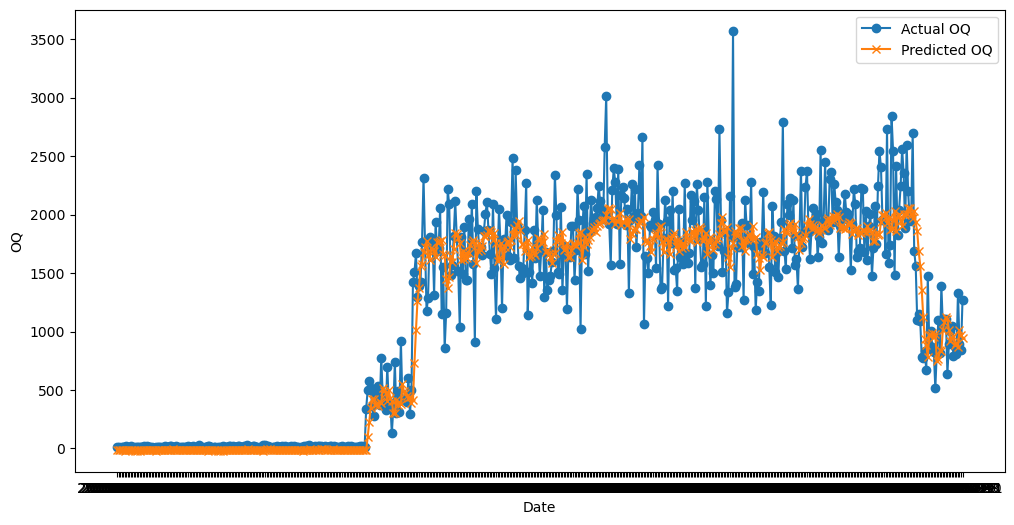

In [9]:
from cProfile import label
from cgi import test
from turtle import color

from matplotlib import markers
import black

from numpy import reshape


type(x_test)
predicted_OQ = model.predict(x_test)
predicted_OQ= scaler.inverse_transform(predicted_OQ)
actual_OQ = scaler.inverse_transform(test_data["Order_Quantity"][sequence_length:].to_numpy().reshape(-1,1))
print()

plt.figure(figsize=(12,6))
plt.plot(test_data.index[sequence_length:], actual_OQ,label='Actual OQ',marker ='o', )
plt.plot(test_data.index[sequence_length:], predicted_OQ,label='Predicted OQ',marker ='x')

plt.xlabel('Date')
plt.ylabel('OQ')
plt.legend()
plt.show()